## Pleiades & Beehive

In [5]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

In [6]:
df1 = pd.read_csv("pleiades6-12.csv")
df2 = pd.read_csv("beehive4-7.csv")
frames = [df1, df2]
df = pd.concat(frames)

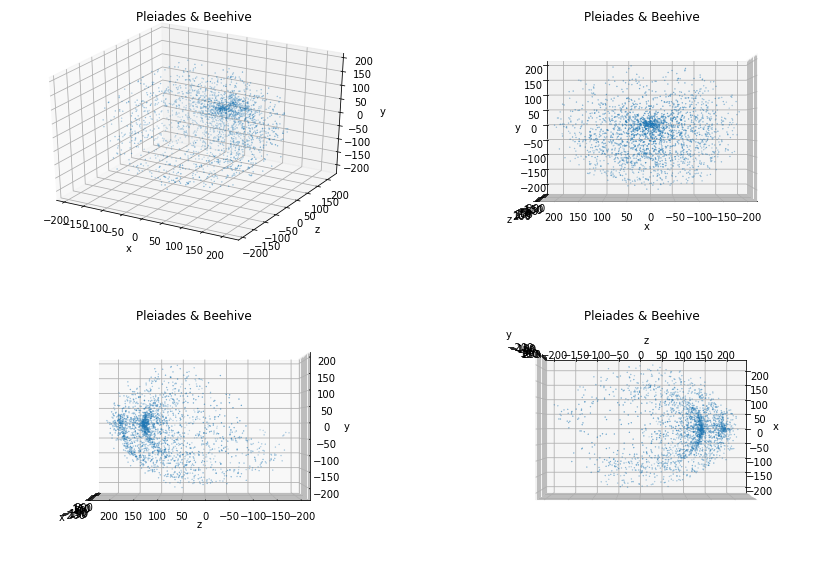

In [7]:
df.loc[:, 'parallax_arcsec'] = df['parallax'].apply(lambda x: x*.001)
df.loc[:, 'R'] = df['parallax_arcsec'].apply(distance)
df.loc[:, 'x'] = df.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'y'] = df.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'z'] = df.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Pleiades & Beehive')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Pleiades & Beehive')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.1)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Pleiades & Beehive')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.1)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Pleiades & Beehive')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()